In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from scipy.stats import boxcox ## z-transformation // standard scaler 

from sklearn.tree import DecisionTreeRegressor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import TransformedTargetRegressor
pd.options.display.max_rows = 50

## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd

# Objectives

- The customer data is collected from an auto insurance company. 
- **Target**:
    1. [ ] Retain customer 
    2. [ ] Develop focused customer retention programs 
    3. [ ] Increase profitable customer response and growth 

# Load data 

In [34]:
ca_numerical= pd.read_csv ("data/ca_numerical_auto_insurance.csv")
ca_categorical= pd.read_csv ("data/categorical_features_auto_insurance.csv")

In [36]:
X=pd.concat([ca_numerical,ca_categorical], axis=1)

In [37]:
X

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,total_claim_amount,renew_offer_type,number_of_open_complaints,region_east,...,vehicle_size_medsize,vehicle_size_small,marital_status_married,marital_status_single,location_code_suburban,location_code_urban,coverage,education,month,policy
0,4809,48029,61,7,52,9,292,3,0,0,...,1,0,1,0,1,0,1,2,2,2
1,2228,92260,64,3,26,1,744,4,0,0,...,1,0,0,1,1,0,1,2,1,1
2,14947,22139,100,34,31,2,480,3,0,1,...,1,0,0,1,1,0,1,3,2,1
3,22332,49078,97,10,3,2,484,2,0,0,...,1,0,0,1,1,0,2,2,1,2
4,9025,23675,117,33,31,7,707,1,0,0,...,1,0,1,0,1,0,3,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,7,1214,3,0,0,...,1,0,1,0,1,0,3,3,1,1
10685,5259,61146,65,7,68,6,273,2,0,0,...,1,0,1,0,0,1,1,2,1,1
10686,23893,39837,201,11,63,2,381,1,0,0,...,1,0,1,0,0,0,2,3,2,2
10687,11971,64195,158,0,27,6,618,1,4,0,...,1,0,0,0,0,1,3,2,2,1


In [88]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   customer_lifetime_value          10689 non-null  int64
 1   income                           10689 non-null  int64
 2   monthly_premium_auto             10689 non-null  int64
 3   months_since_last_claim          10689 non-null  int64
 4   months_since_policy_inception    10689 non-null  int64
 5   number_of_policies               10689 non-null  int64
 6   total_claim_amount               10689 non-null  int64
 7   renew_offer_type                 10689 non-null  int64
 8   number_of_open_complaints        10689 non-null  int64
 9   region_east                      10689 non-null  int64
 10  region_north west                10689 non-null  int64
 11  region_west region               10689 non-null  int64
 12  response_yes                     10689 non-nul

# X-Y split

In [39]:
x= X.drop("total_claim_amount", axis=1)
y= X.total_claim_amount

In [43]:
x

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,renew_offer_type,number_of_open_complaints,region_east,region_north west,...,vehicle_size_medsize,vehicle_size_small,marital_status_married,marital_status_single,location_code_suburban,location_code_urban,coverage,education,month,policy
0,4809,48029,61,7,52,9,3,0,0,0,...,1,0,1,0,1,0,1,2,2,2
1,2228,92260,64,3,26,1,4,0,0,0,...,1,0,0,1,1,0,1,2,1,1
2,14947,22139,100,34,31,2,3,0,1,0,...,1,0,0,1,1,0,1,3,2,1
3,22332,49078,97,10,3,2,2,0,0,1,...,1,0,0,1,1,0,2,2,1,2
4,9025,23675,117,33,31,7,1,0,0,1,...,1,0,1,0,1,0,3,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,7,3,0,0,0,...,1,0,1,0,1,0,3,3,1,1
10685,5259,61146,65,7,68,6,2,0,0,1,...,1,0,1,0,0,1,1,2,1,1
10686,23893,39837,201,11,63,2,1,0,0,0,...,1,0,1,0,0,0,2,3,2,2
10687,11971,64195,158,0,27,6,1,4,0,0,...,1,0,0,0,0,1,3,2,2,1


array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly_premium_auto'}>,
        <AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>,
        <AxesSubplot:title={'center':'number_of_policies'}>],
       [<AxesSubplot:title={'center':'renew_offer_type'}>,
        <AxesSubplot:title={'center':'number_of_open_complaints'}>,
        <AxesSubplot:title={'center':'region_east'}>,
        <AxesSubplot:title={'center':'region_north west'}>,
        <AxesSubplot:title={'center':'region_west region'}>,
        <AxesSubplot:title={'center':'response_yes'}>],
       [<AxesSubplot:title={'center':'gender_m'}>,
        <AxesSubplot:title={'center':'policy_type_personal auto'}>,
        <AxesSubplot:title={'center':'policy_type_special auto'}>,
        <AxesSubplot:title={'center':'employment_status_employed'}>,
        <

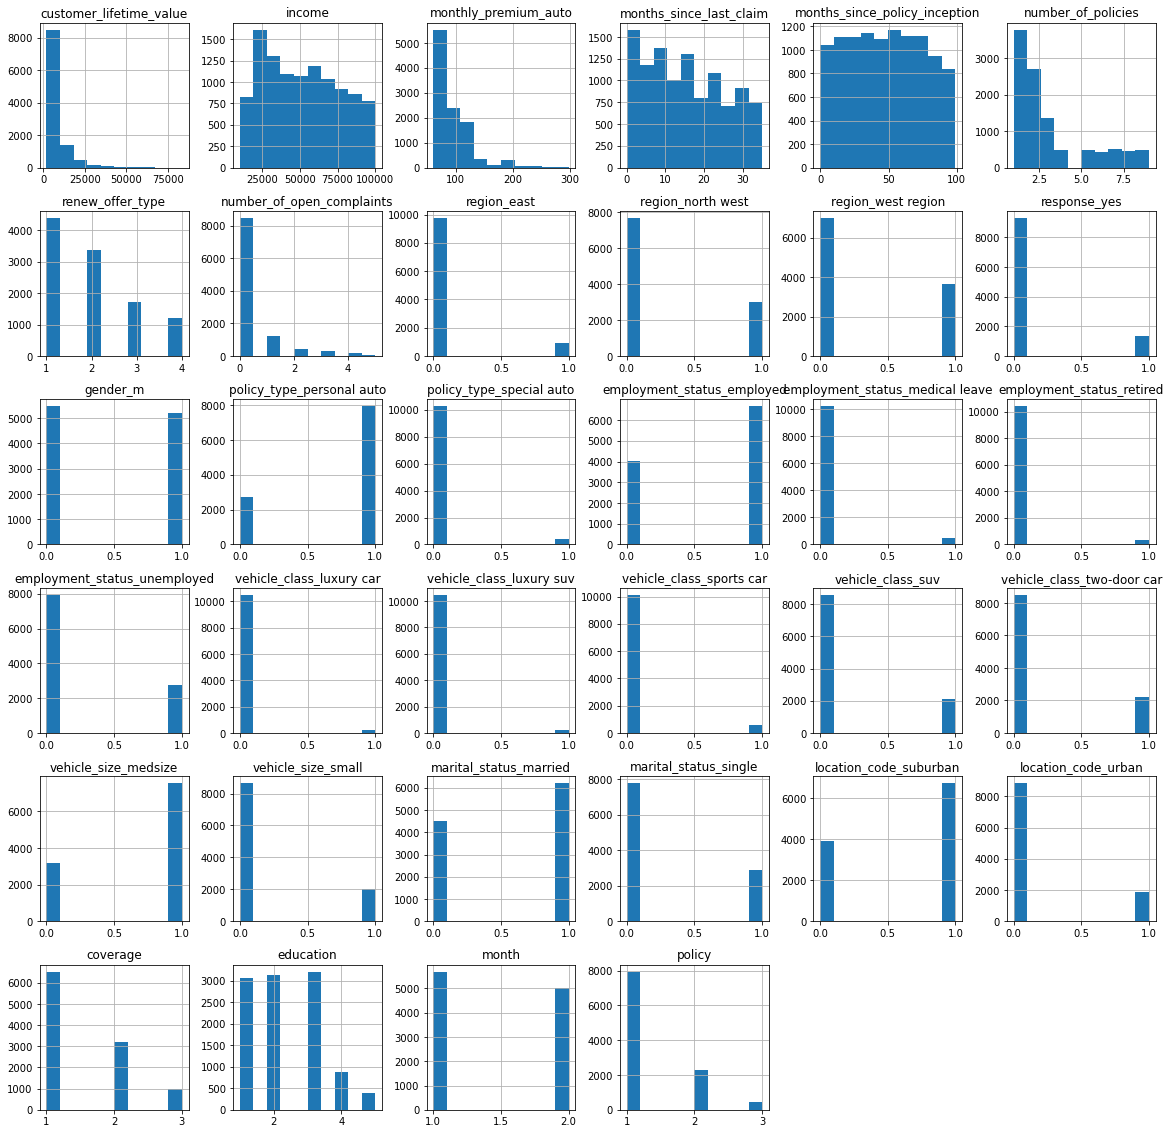

In [44]:
x.hist(figsize=(20,20))

# Train-test split


- test_size = 0.3 
    - is the percentage of data from the ca_numerical data frame we wish to use as test data for validating the model  

__Remember__ its supervised ML 

In [45]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=.30,random_state=123)

In [46]:
std_scaler=StandardScaler().fit(x_train)   ##. finding the parameters ( mean, variance from the training set )

x_train_scaled=std_scaler.transform(x_train)

In [47]:
x_train.shape

(7482, 34)

# Standardize

In [48]:
x_test_scaled=std_scaler.transform(x_test) # Scale back the data to the original representation.


<mark>Standardize features by removing the mean and scaling to unit variance. </mark>
[Here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [49]:
print(x_train_scaled) # 70% data from ca_numerical we use to create the model. it trains with it.
print("--------")
print(x_test_scaled) # 30%  data from ca_numerical  we use to test the created model with

[[-0.11021627 -1.27291744 -0.67143823 ... -0.25803541 -0.94080264
  -0.55120682]
 [-0.42794064  0.74729478 -0.72925469 ...  0.67463171 -0.94080264
  -0.55120682]
 [-0.5223013   0.26592193  0.48489091 ... -1.19070252 -0.94080264
  -0.55120682]
 ...
 [-0.81132612 -1.17224873 -0.90270406 ...  0.67463171  1.06292219
  -0.55120682]
 [ 2.25575772  0.98537142 -0.78707115 ...  0.67463171 -0.94080264
   3.15421046]
 [ 1.18923585  0.68583346 -0.55580532 ... -0.25803541 -0.94080264
  -0.55120682]]
--------
[[-0.40967729  1.58428551 -0.61362178 ... -0.25803541  1.06292219
  -0.55120682]
 [-0.7597249  -0.93947257 -0.64253    ... -0.25803541 -0.94080264
  -0.55120682]
 [ 0.57248529 -1.23371005 -0.90270406 ...  1.60729882 -0.94080264
  -0.55120682]
 ...
 [-0.79857077 -1.05867274 -0.58471355 ... -0.25803541 -0.94080264
   1.30150182]
 [-0.42547654 -0.97370317 -0.81597938 ... -0.25803541 -0.94080264
  -0.55120682]
 [-0.49881985 -0.95695203  0.71615674 ... -0.25803541  1.06292219
  -0.55120682]]


# Modeling using Scikit Learn
 
 ## Fitting
 - <mark>y= a (alpha) + bx (beta)</mark>
- we have 6 independent/Input features therefore the model should give us 6 betas back 

In [50]:
model= LinearRegression()#model
model.fit(x_train_scaled, y_train) #model train

LinearRegression()

<mark>giving back the (b1,b2,b3,b4,b5,b6.. b34)</mark>


In [52]:
model.coef_

array([-2.63534242e-01, -4.98677928e+00,  1.79132645e+02,  4.42796615e+00,
        1.55162509e-01, -1.29058371e+00,  2.95495555e+00,  1.23895377e+00,
        2.20793457e+00,  1.19445492e-01,  2.13813260e+00, -8.19594141e+00,
        7.97777410e+00, -8.46558820e+13,  3.85208021e+13, -1.56125400e+00,
        4.14250801e+00,  4.92014919e-02,  3.84929513e+01,  4.97377256e+00,
       -1.03105768e+00, -4.68614049e+00, -6.13281067e+00,  1.90183024e-01,
       -3.30593174e+00,  3.17188953e-01, -2.41459837e-01,  3.07828759e+01,
        1.84142151e+02,  8.48132032e+01, -5.67481766e+00, -4.48933215e+00,
        7.85662328e-01, -1.04652559e+14])

<mark>giving back the alpha </mark>

- a = 433.07858313260255

In [53]:
model.intercept_

433.07858313260255

In [55]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   customer_lifetime_value          10689 non-null  int64
 1   income                           10689 non-null  int64
 2   monthly_premium_auto             10689 non-null  int64
 3   months_since_last_claim          10689 non-null  int64
 4   months_since_policy_inception    10689 non-null  int64
 5   number_of_policies               10689 non-null  int64
 6   renew_offer_type                 10689 non-null  int64
 7   number_of_open_complaints        10689 non-null  int64
 8   region_east                      10689 non-null  int64
 9   region_north west                10689 non-null  int64
 10  region_west region               10689 non-null  int64
 11  response_yes                     10689 non-null  int64
 12  gender_m                         10689 non-nul

## Model Prediction/ Testing

In [56]:
y_pred_test=model.predict(x_test_scaled) #model prediction with the 30% observations we include in the train-test-split

y_pred_train = model.predict (x_train_scaled) # prediction of y with the 70% of the train data 


In [57]:
y_pred_test

array([461.12065598, 405.98003098, 137.10503098, ..., 573.79422993,
       -20.87153152, 465.35503098])

In [58]:
y_test

4665     345
4072     345
4549     257
4211     445
3081     523
        ... 
3488     404
1667     554
1516     350
10215     27
2931     320
Name: total_claim_amount, Length: 3207, dtype: int64

## Predicition with new data 

    We use following new customer as an example 
- customer_lifetime_value = __400__
- income = **80.000**
- monthly_premium_auto = **150** 
- months_since_last_claim =**3**
- months_since_policy_inception = **12**
- number_of_policies = **4**
- renew_offer_type  = **2**
- number_of_open_complaints  = **4**
- region_east = **0**
- region_north west =**1**
- region_west region  = **0**
- response_yes  = **1** 
- gender_m      = **1**
- policy_type_personal auto       = **0**
- policy_type_special auto        = **0**
- employment_status_employed      = **1** 
- employment_status_medical leave  = **0**
- employment_status_retired        =**0**
- employment_status_unemployed     =**0**
- vehicle_class_luxury car         =**0**
- vehicle_class_luxury suv        =**1**
- vehicle_class_sports car       =**0**
- vehicle_class_suv               =**0**
- vehicle_class_two-door car      =**0**
- vehicle_size_medsize             =**0**
- vehicle_size_small                 =**0**
- marital_status_married      
-  marital_status_single =**1**
-  location_code_suburban   = **1**        
- location_code_urban       =**0**       
- coverage               =**2**         
-  education         =**3**               
- month          =**1**                  
-  policy   =**2**

In [68]:
new_data=[400,80000,150,3,12,4,2,4,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,2,3,1,2,1,1]
new_data_scaled= std_scaler.transform(np.array(new_data).reshape(-1,34)) # using std_scaler.transform because we need the same means, and std. deviation from the X_train 

/Users/elisabethoeljeklaus/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [69]:
np.array(np.array(new_data).reshape(-1,34)).shape


(1, 34)

In [70]:
model.predict(new_data_scaled) # output is the  prediction of the value of the total claim amount in $

array([1.93890701e+14])

#  Model Evaluation

- Evaluating the Model (Validation test - train)

In [71]:
y_test

4665     345
4072     345
4549     257
4211     445
3081     523
        ... 
3488     404
1667     554
1516     350
10215     27
2931     320
Name: total_claim_amount, Length: 3207, dtype: int64

In [72]:
y_pred_test 

array([461.12065598, 405.98003098, 137.10503098, ..., 573.79422993,
       -20.87153152, 465.35503098])

In [73]:
result=pd.DataFrame({"y_test":y_test,"y_pred_test":y_pred_test})

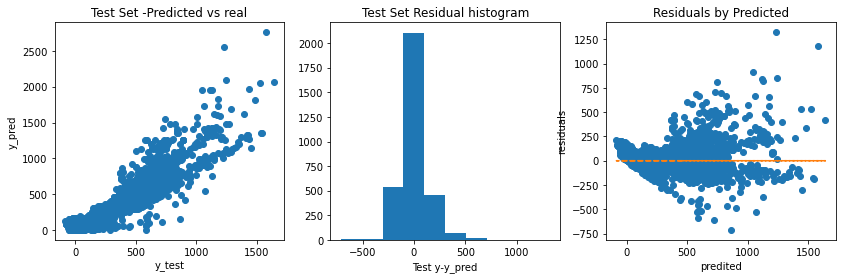

In [74]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred_test, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred_test)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")


ax[2].plot(y_pred_test,y_test - y_pred_test,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred_test,np.zeros(len(y_pred_test)),linestyle='dashed')

<AxesSubplot:xlabel='y_pred_test', ylabel='y_test'>

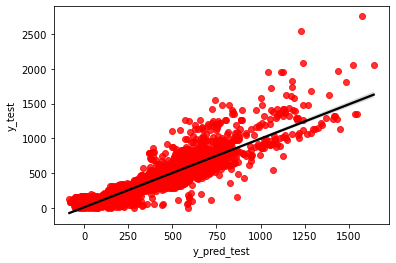

In [75]:
sns.regplot(x="y_pred_test", y="y_test", data=result, scatter_kws={"color":"red"}, line_kws={"color":"black"})

In [76]:
print(mse(y_test,y_pred_test))

19223.138211497368


In [77]:
print(mae(y_test,y_pred_test)) 

96.10529102735283


In [78]:
print(mse(y_test, y_pred_test, squared=False))

138.6475322950155


##  R<sup>2</sup> to explain the quality of the model 
    we compare the R2 from the train and the test data --> there are 2 different sickit functions to find R^2
      

<mark> To IMPROVE the R2 (increase the KPI) there are a lot of diffrent approaches: </mark>
1. remove outliers and different 
2. [klick here for more](https://towardsdatascience.com/how-to-improve-the-accuracy-of-a-regression-model-3517accf8604)


    


In [79]:
R2=r2_score(y_test,y_pred_test)
R2


0.7695482517061298

In [80]:
R22=r2_score(y_train,y_pred_train)
R22

0.7697937049368153

In [82]:
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
Adj_R2

0.7670780879476206

# Feature Importance

In [84]:
# getting number of independent features  /parameters of linear funcciton
x_test.shape[1]

34

In [86]:
features_importances = pd.DataFrame(data = {"Attribute": x_train.columns, "Importance": abs(model.coef_)})
features_importances = features_importances.sort_values(by="Importance", ascending=False)
features_importances

,Attribute,Importance
33,policy,1.046526e+14
13,policy_type_personal auto,8.465588e+13
14,policy_type_special auto,3.852080e+13
28,location_code_suburban,1.841422e+02
2,monthly_premium_auto,1.791326e+02
29,location_code_urban,8.481320e+01
18,employment_status_unemployed,3.849295e+01
27,marital_status_single,3.078288e+01
11,response_yes,8.195941e+00
12,gender_m,7.977774e+00


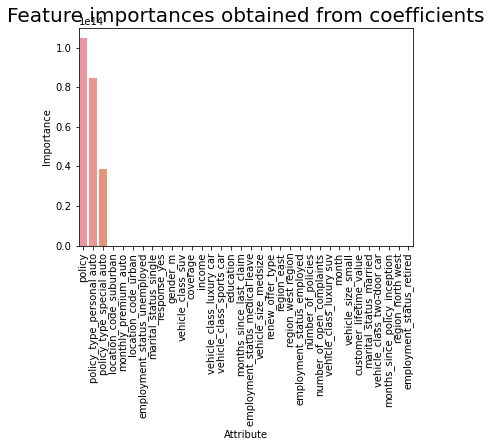

In [87]:
sns.barplot(x="Attribute",y="Importance", data=features_importances)
plt.title("Feature importances obtained from coefficients", size=20)
plt.xticks (rotation="vertical")
plt.show()

# OPTIONAL Removing Outliers in the numerical data fram

In [96]:
x
model_1= RandomForestRegressor()
#transforming target variable through quantile transformer
ttr = TransformedTargetRegressor(regressor=model, transformer=QuantileTransformer(output_distribution='normal'))
ttr.fit(x_train, y_train)
yhat = ttr.predict(x_test)
r2_score(y_test,y_pred_test), mae(y_test, y_pred_test), np.sqrt(mse(y_test, y_pred_test))

(0.7695482517061298, 96.10529102735283, 138.6475322950155)

In [101]:
model_2 = DecisionTreeRegressor()
regr_trans = TransformedTargetRegressor(regressor=model, transformer=QuantileTransformer(output_distribution='normal'))
regr_trans.fit(x_train, y_train)
yhat = regr_trans.predict(x_test)
round(r2_score(y_test, y_pred_test), 3), round(mae(y_test, y_pred_test), 2), round(np.sqrt(mse(y_test, y_pred_test)),2)

(0.77, 96.11, 138.65)

In [103]:
ca_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   customer_lifetime_value        10689 non-null  int64
 1   income                         10689 non-null  int64
 2   monthly_premium_auto           10689 non-null  int64
 3   months_since_last_claim        10689 non-null  int64
 4   months_since_policy_inception  10689 non-null  int64
 5   number_of_policies             10689 non-null  int64
 6   total_claim_amount             10689 non-null  int64
dtypes: int64(7)
memory usage: 584.7 KB


In [104]:
ca_numerical[(np.abs(stats.zscore(ca_numerical[0])) < 3)]

NameError: name 'stats' is not defined